In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

In [5]:
dataset = pd.read_csv('insurance.csv')

In [7]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
dataset.shape

(1338, 7)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


categorical features 

*   sex
*   smoker
*   region







In [8]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

data analysis


In [9]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-15-55192b2f6212>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['age'])


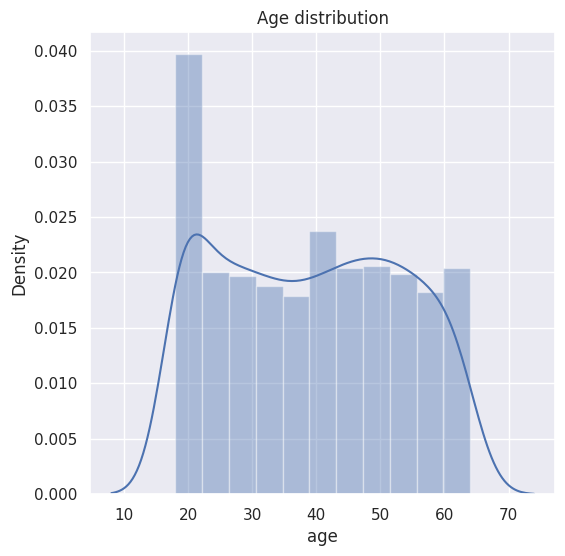

In [15]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(dataset['age'])
plt.title("Age distribution")
plt.show()

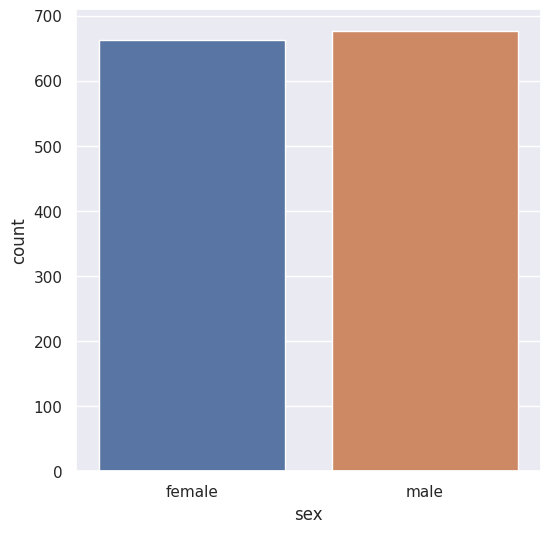

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=dataset)
plt.show()


<ipython-input-18-b29241c5f64f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['bmi'])


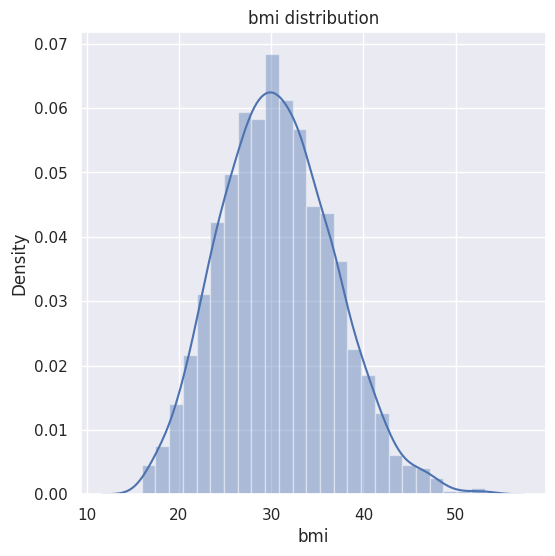

In [18]:
plt.figure(figsize=(6,6))
sns.distplot(dataset['bmi'])
plt.title("bmi distribution")
plt.show()

normal bmi range --> 18.5 to 24.9

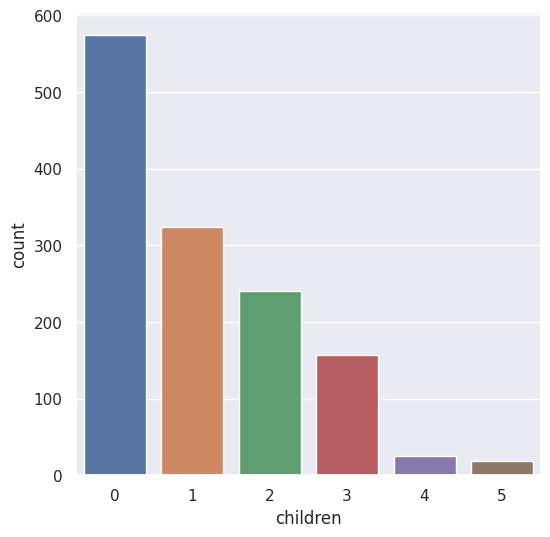

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=dataset)
plt.show()

In [24]:
dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

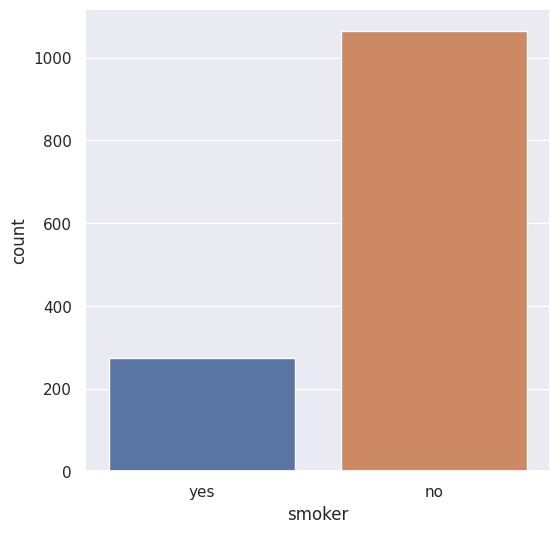

In [25]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=dataset)
plt.show()

In [26]:
dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

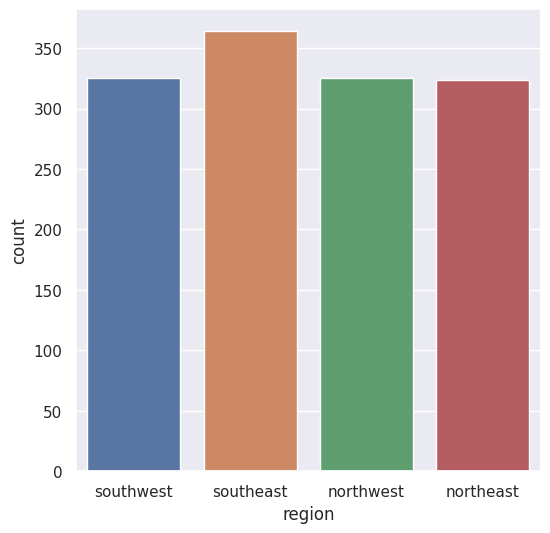

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=dataset)
plt.show()

<ipython-input-28-df063cdcb49b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['charges'])


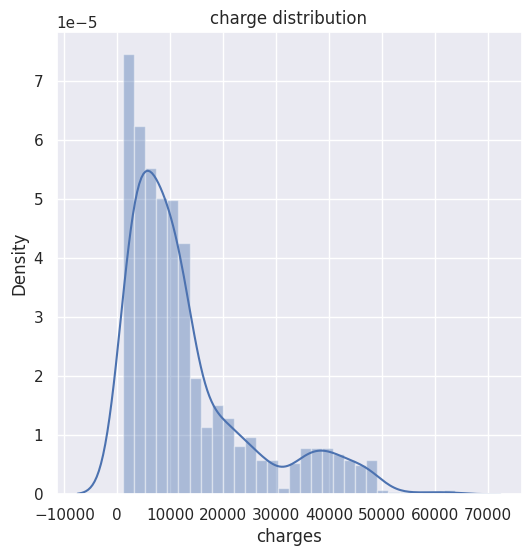

In [28]:
plt.figure(figsize=(6,6))
sns.distplot(dataset['charges'])
plt.title("charge distribution")
plt.show()

In [33]:
#encoding categorical features of sex
dataset.replace({'sex':{'male':0,'female':1}},inplace= True)
#encoding categorical features of smoke
dataset.replace({'smoker':{'yes':0,'no':1}},inplace= True)
#for region
dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [34]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [35]:
#splitting the features and target

x= dataset.drop(columns='charges',axis=1)
y= dataset['charges']

In [36]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [37]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [39]:
#model training
regressor =LinearRegression()

In [40]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [45]:
 y_training=regressor.predict(X_train)

In [51]:
r2_train =metrics.r2_score(Y_train,y_training)
print(r2_train)

0.751505643411174


In [52]:
y_pred=regressor.predict(X_test)

In [53]:
r2_test =metrics.r2_score(Y_test,y_pred)
print(r2_test)

0.7447273869684076


In [55]:
input =(31,1,25.74,0,1,0)

input_as_array = np.asarray(input)

input_reshaped = input_as_array.reshape(1,-1)

prediction = regressor.predict(input_reshaped)
print(prediction)

[3760.0805765]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
